In [5]:
!pip install bing-image-downloader


In [8]:
from bing_image_downloader import downloader

# Define the search keyword and the number of images to download
search_keyword = 'person'
limit = 200  # Set the number of images you want to download

# Download the images
downloader.download(search_keyword, limit=limit, output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

print(f"Downloaded images for keyword: {search_keyword}")


[%] Downloading Images to /Users/baselabubaker/Desktop/MIU/ML/Notebooks/images/person


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://get.pxhere.com/photo/man-person-people-portrait-professional-profession-smiling-senior-citizen-elder-face-happy-980074.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://toppng.com/uploads/preview/stock-person-png-stock-photo-man-11563049686zqeb9zmqjd.png
[%] File Downloaded !

[%] Downloading Image #3 from https://www.kevinashleyphotography.com/wp-content/uploads/2015/11/person.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://get.pxhere.com/photo/work-man-person-people-male-meeting-young-corporate-office-professional-business-profession-speaker-elder-job-meet-official-clergy-business-executive-businessperson-1079382.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://static.pexels.com/photos/50855/pexels-photo-50855.jpeg
[%] File Downloaded !

[%] Downloading Ima

In [2]:
class Dataset:
    def __init__(self):
        self.location = "dataset/hardhat"

dataset = Dataset()

Number of categories: 4
Number of categories:    id     name supercategory
0   0  Workers          none
1   1     head       Workers
2   2   helmet       Workers
3   3   person       Workers
Number of images: 5269
Number of annotations: 20231


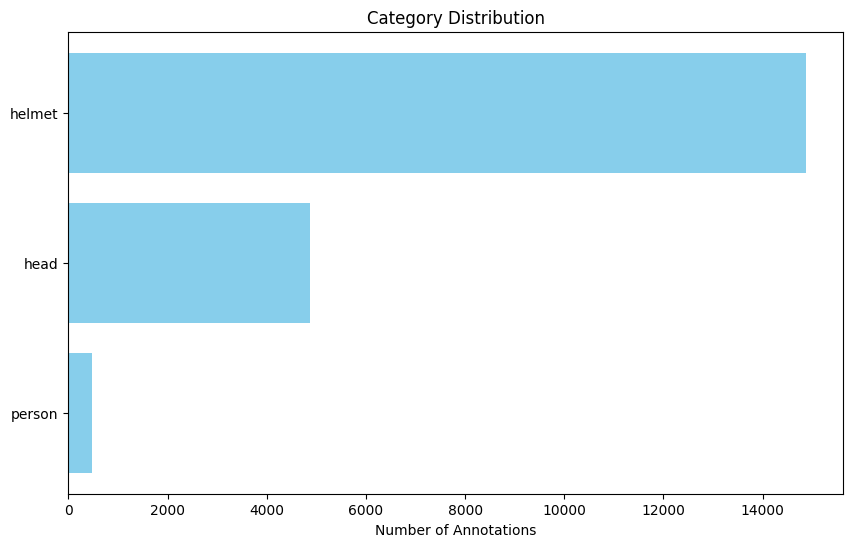

Average number of annotations per image: 3.8396280129056746
Median number of annotations per image: 3.0
Max number of annotations in a single image: 35
   id  image_id  category_id                bbox  area segmentation  iscrowd
0   0         0            2   [428, 63, 35, 35]  1225           []        0
1   1         0            2  [267, 122, 34, 34]  1156           []        0
2   2         1            2  [149, 100, 56, 73]  4088           []        0
3   3         1            2  [100, 115, 63, 79]  4977           []        0
4   4         1            2  [198, 135, 41, 78]  3198           []        0


In [11]:
import json
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# Load COCO JSON dataset
with open(dataset.location+'/train/_annotations.coco.json') as f:
    coco_data = json.load(f)

# Extracting necessary information
categories = coco_data['categories']
annotations = coco_data['annotations']
images = coco_data['images']

# Creating dataframes
categories_df = pd.DataFrame(categories)
annotations_df = pd.DataFrame(annotations)
images_df = pd.DataFrame(images)

# Displaying basic statistics
print(f"Number of categories: {len(categories_df)}")
print(f"Number of categories: {categories_df}")
print(f"Number of images: {len(images_df)}")
print(f"Number of annotations: {len(annotations_df)}")

# Category distribution
category_counts = annotations_df['category_id'].value_counts().rename_axis('category_id').reset_index(name='counts')
category_counts = category_counts.merge(categories_df, left_on='category_id', right_on='id')[['name', 'counts']]

# Plotting category distribution
plt.figure(figsize=(10, 6))
plt.barh(category_counts['name'], category_counts['counts'], color='skyblue')
plt.xlabel('Number of Annotations')
plt.title('Category Distribution')
plt.gca().invert_yaxis()
plt.show()

# Display some statistics
image_annotations_counts = annotations_df['image_id'].value_counts()
print(f"Average number of annotations per image: {image_annotations_counts.mean()}")
print(f"Median number of annotations per image: {image_annotations_counts.median()}")
print(f"Max number of annotations in a single image: {image_annotations_counts.max()}")

# Sample annotations
sample_annotations = annotations_df.head()
print(sample_annotations)

# Additional statistics or visualizations can be added as needed
